In [1]:
import numpy as np
import pandas as pd

In [2]:
ds_train = pd.read_csv('Train_Data.csv')
ds_train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


In [3]:
print(ds_train.shape)
# print(ds_train.info())
# ds_train.nunique()
# ds_train.isnull().sum()

(86845, 43)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
# Check for missing values
print(ds_train.isnull().sum())

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [6]:
# Encode categorical variables
categorical_features = ['protocoltype', 'service', 'flag']
numeric_features = ds_train.columns.difference(categorical_features + ['attack'])
numeric_features

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the transformations to the training data
X = ds_train.drop('attack', axis=1)
y = ds_train['attack']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

print(X_train.shape)
print(X_val.shape)
print(X_train)


(65133, 117)
(21712, 117)
[[ 2.39451522 -0.37083086 -0.05202975 ...  0.          1.
   0.        ]
 [ 3.81928077 -0.37083086 -0.05362661 ...  0.          1.
   0.        ]
 [-0.80103035 -0.37083086 -0.04692811 ...  0.          1.
   0.        ]
 ...
 [ 0.09453656  0.20561691 -0.05370956 ...  0.          0.
   0.        ]
 [-0.80103035 -0.37083086 -0.02753772 ...  0.          1.
   0.        ]
 [ 0.50161243  0.12326723 -0.05370956 ...  0.          0.
   0.        ]]


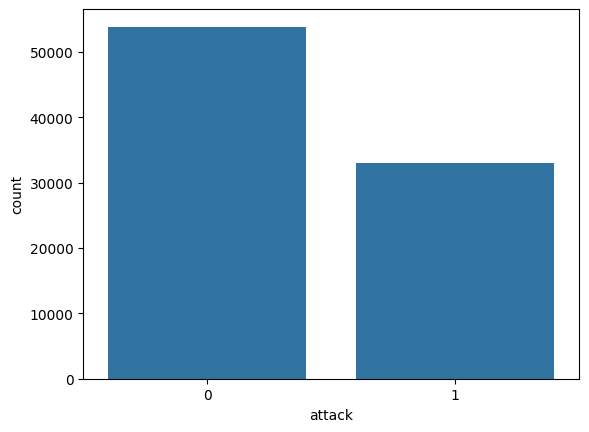

In [7]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.countplot(x='attack', data=ds_train)
plt.show()

In [8]:
# Correlation matrix
# X_train_df = pd.DataFrame(X_train)
# corr_matrix = X_train_df.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
# plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression:")
print(classification_report(y_val, y_pred_lr))

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)
print("Decision Tree:")
print(classification_report(y_val, y_pred_dt))

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest:")
print(classification_report(y_val, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13452
           1       1.00      1.00      1.00      8260

    accuracy                           1.00     21712
   macro avg       1.00      1.00      1.00     21712
weighted avg       1.00      1.00      1.00     21712

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13452
           1       1.00      1.00      1.00      8260

    accuracy                           1.00     21712
   macro avg       1.00      1.00      1.00     21712
weighted avg       1.00      1.00      1.00     21712

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13452
           1       1.00      1.00      1.00      8260

    accuracy                           1.00     21712
   macro avg       1.00      1.00      1.00     21712
weighted avg       1.00

In [9]:
#Model Evaluation and HyperParameter Tuning

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val)
print("Best Random Forest Model:")
print(classification_report(y_val, y_pred_best))

Best Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13452
           1       1.00      1.00      1.00      8260

    accuracy                           1.00     21712
   macro avg       1.00      1.00      1.00     21712
weighted avg       1.00      1.00      1.00     21712



In [11]:
# Load the test dataset
ds_test = pd.read_csv('Test_Data.csv')
print(ds_test.shape)

# Apply preprocessing to the test data
X_test = preprocessor.transform(ds_test)

# Predict the test set
y_test_pred = best_model.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({'attack': y_test_pred})
submission.to_csv('submission_DILKHUSH_MEENA_IITK.csv', index=False)
submission.head()

(21712, 42)


,attack
0,1
1,0
2,1
3,1
4,1
